# Multivariate linear regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt                        # To create plots
import numpy as np                                     # To perform calculations quickly
import pandas as pd                                    # To load in and manipulate data
from sklearn import linear_model                       # Linear model
from sklearn.model_selection import train_test_split   # Split up the data in a train and test set
from ipywidgets import interact,widgets                # For interactive execution of code

In multivariate linear regression, the model is determined by a trainingset with multiple features. 

For example: the blood pressure is determined by both age and weight

Instead of the usual y=ax+b we now will get:

$h_\theta(x)=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$

## Simple dataset

In [2]:
# Load in the data
data = pd.read_csv("../data/bloodpressure.csv")
data.head()

,age,weight,blood_pressure
0,52,78,136
1,59,83,143
2,67,88,153
3,73,96,162
4,64,89,161


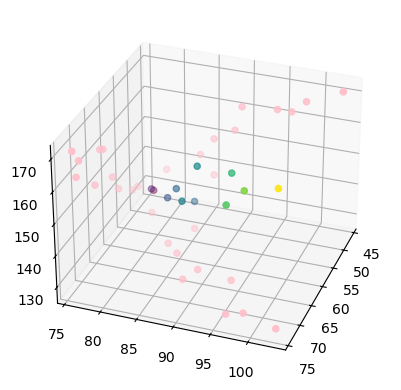

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data.age,data.weight,data.blood_pressure,c=data.weight)
# Project the points on the walls
ax.scatter3D(data.age.min(),data.weight,data.blood_pressure,c='pink')
ax.scatter3D(data.age,data.weight.min(),data.blood_pressure,c='pink')
ax.scatter3D(data.age,data.weight,data.blood_pressure.min(),c='pink')
ax.view_init(30, 20)

In [4]:
features=data.drop('blood_pressure',axis=1)
target=data.blood_pressure

In [5]:
lregmodel=linear_model.LinearRegression()

lregmodel.fit(features,target)

print(f"Coefficients: {lregmodel.coef_}")
print(f"Intercept: {lregmodel.intercept_}")

Coefficients: [0.85708344 0.71619724]
Intercept: 34.62648847714202


The equation that best fits our points in the dataset is:

$blood\_pressure = 0.85708344 * age + 0.71619724 * weight + 34.62648847714202$

In [6]:
# Predict the blood pressure of a person thats 55 years old and weighs 80kg

blood_pressure = 0.85708344 * 55 + 0.71619724 * 80 + 34.62648847714202
print(blood_pressure)

#or

print(lregmodel.predict([[55,80]]))

139.06185687714202
[139.06185643]


/home/cedric/miniforge3/envs/bit07/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## More complex dataset

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per  $10,000 
* PTRATIO - pupil-teacher ratio by town
* B -  1000(𝐵𝑘−0.63)2  where  𝐵𝑘  is the proportion of blacks by town
* LSTAT - % lower status of the population

In [7]:
data = pd.read_csv("../data/boston_housing.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,504.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,453.600008
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,728.700016
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,701.400032
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,760.200016


In [8]:
# Number of rows and columns
data.shape

(506, 14)

In [9]:
# Get statistics for the table
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,4.673727,11.363636,11.136779,0.0,25.892968,87.231275,68.574901,11.445487,9.549407,408.237154,18.455534,356.674030,12.653063,473.188934
std,25.223207,23.322453,6.860353,0.0,132.093200,747.124382,28.148862,172.108941,8.707259,168.537116,2.164946,91.294863,7.141062,193.139186
min,0.006320,0.000000,0.460000,0.0,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,105.000000
25%,0.082045,0.000000,5.190000,0.0,0.449000,5.888000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,357.525002
50%,0.256510,0.000000,9.690000,0.0,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,445.200016
75%,3.689388,12.500000,18.100000,0.0,0.624000,6.630750,94.074999,5.213925,24.000000,666.000000,20.200001,396.225006,16.954999,525.000000
max,537.000000,100.000000,27.740000,0.0,713.000000,8375.000000,100.000000,3875.000000,24.000000,711.000000,22.000000,396.899994,37.970001,1050.000000


In [10]:
# Remove uninformative columns
## CHAS is always 0
data.drop("CHAS",axis=1,inplace=True)

### Outliers
Outliers are values that are very different from normal values. In some cases you want to remove these values. In other cases however, you want to keep these. For example when you want to detect these outliers.

Outliers are often described differently. In this case we will only keep values that lay within 3 standard deviations from the mean. We will not take the categorical or binary values into consideration.

We can use the zscore function from scipy. This will return the z-scores for each value. A z of 1 means the value is 1 standard deviation higher mean. A z of -1 means that its one standard deviation lower than the mean.

In [11]:
# Remove outliers
from scipy import stats

# Get Z-scores for specific columns
zscores=stats.zscore(data)
# Absolute values
abs_zcores=abs(zscores)
# Is Z-score < 3
filtered_zscore=abs_zcores<3
# Get a True if all collumns of a row have z-scores <3, else: False
filtered = filtered_zscore.all(axis=1)
# Only keep these rows
data_preprocessed = data[filtered]

data_preprocessed.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,2.649013,9.988662,10.759479,0.547575,6.265785,67.632200,3.851895,8.478458,389.045351,18.387302,375.393853,12.165329,478.785715
std,6.273766,19.941189,6.749778,0.112896,0.685393,27.997824,2.054524,8.000859,158.293650,2.164533,49.296266,6.632866,180.278859
min,0.006320,0.000000,1.250000,0.385000,3.561000,2.900000,1.169100,1.000000,188.000000,12.600000,83.449997,1.730000,105.000000
25%,0.081870,0.000000,5.190000,0.449000,5.877000,45.000000,2.122200,4.000000,277.000000,17.000000,377.730011,6.920000,380.100008
50%,0.217190,0.000000,8.140000,0.524000,6.172000,74.500000,3.375100,5.000000,311.000000,18.700001,392.200012,10.740000,455.700016
75%,1.656600,12.500000,18.100000,0.609000,6.590000,93.599998,5.231100,8.000000,432.000000,20.200001,396.899994,15.940000,525.000000
max,67.920799,80.000000,27.740000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.899994,31.990000,1050.000000


<Axes: >

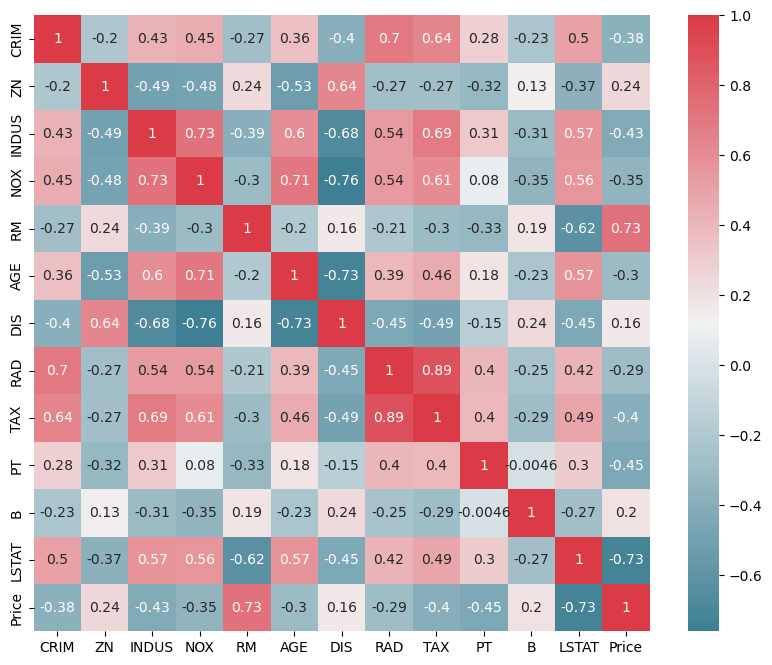

In [12]:
import seaborn as sns
# Visualize correlations
f, ax = plt.subplots(figsize=(10, 8))
corr = data_preprocessed.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

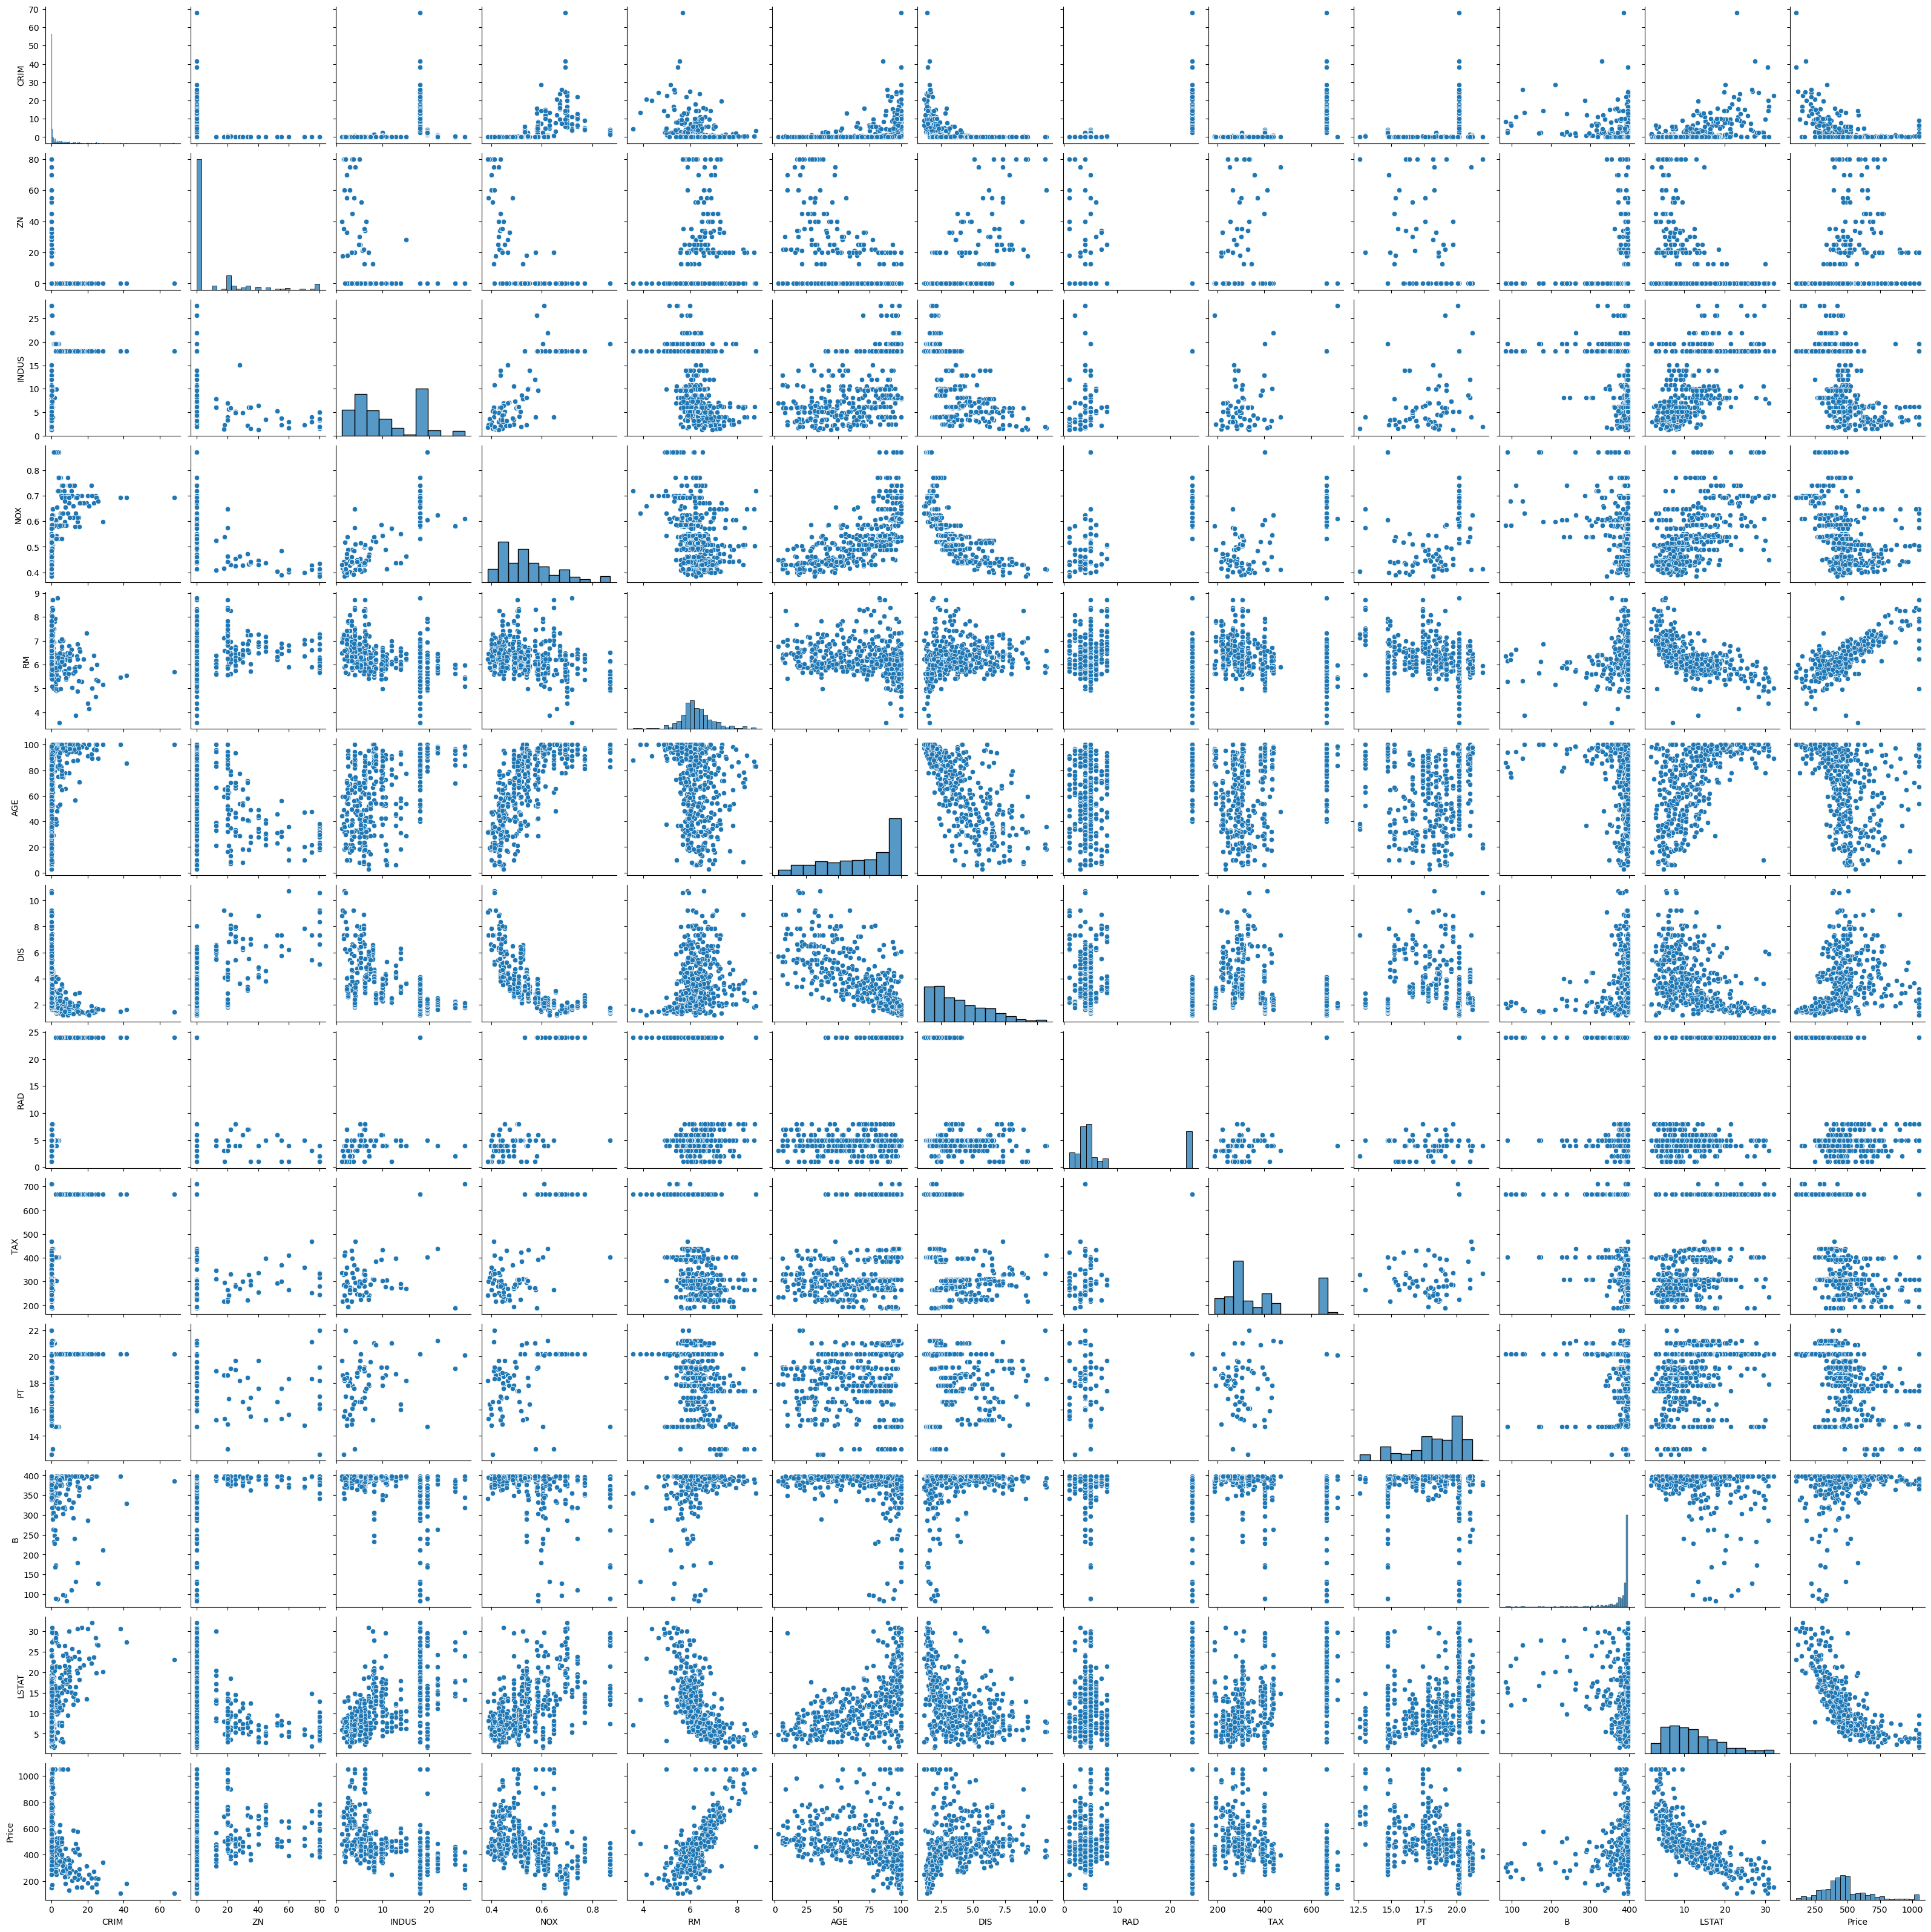

In [13]:
# Visualize pairplots
sns.pairplot(data_preprocessed);

In [14]:
# Split into features and targets
X = data_preprocessed.drop("Price",axis=1)
y = data_preprocessed["Price"]

### Train and test set
Instead of training or model on the entire dataset, we will split up the data in a training set and a test set.

This will allow us to see if our model is also good on unseen data.

If our model has a low error on our training set, but a high error on our test set, then our model is **overfitted**

If our model has a high error on our training and test set, then our model is **underfitted** or our model is **not complex enough** for the data

![title](../images/under-overfit.png)

In [15]:
# Split data in train and test set
## train_test_split takes X, y, a test (or train size) and a random_state (=seed)
## This size can be the fraction (0.33) = 30% or an absolute number (1000)
## The seed allows you to always have the exact same split (useful for testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [16]:
# Create an empty model
lregmodel=linear_model.LinearRegression()

# Fit our training data on the model
lregmodel.fit(X_train,y_train)

# Resulting coefficients and intercept
print(f"Coefficients: {(coef := lregmodel.coef_)}")          # The walrus operator (:=) is used to assign and use a variable at the same time
print(f"Intercept: {(intercept := lregmodel.intercept_)}")   # This way, we can use coef and intercept in the next part

# Results in:

## Get the column names of X_train
columns = X_train.columns

## Combine the coefficient with the correct column name:
## Zip function will combine 2 lists/arrays as following: [a,b,c] and [1,2,3] => [(a,1),(b,2),(c,3)]

coefpart = " + ".join([f"{round(coefficient,3)} * {feature}" for feature,coefficient in zip(columns,coef)])

print(f"\nPredicted price = {coefpart} + {intercept}")

Coefficients: [-3.56141289e+00  4.05479295e-01  8.14080284e-01 -2.70514977e+02
  8.96450415e+01 -3.02997262e-01 -2.77339444e+01  7.47151897e+00
 -2.92233040e-01 -1.61741146e+01  7.62044683e-02 -1.17962045e+01]
Intercept: 650.6520224880709

Predicted price = -3.561 * CRIM + 0.405 * ZN + 0.814 * INDUS + -270.515 * NOX + 89.645 * RM + -0.303 * AGE + -27.734 * DIS + 7.472 * RAD + -0.292 * TAX + -16.174 * PT + 0.076 * B + -11.796 * LSTAT + 650.6520224880709


In [17]:
house = np.array([0.04,80,4.95,0.41,6.63,23.40,5.12,4,245,19.20,396.90,4.70])

# The model expects an array of arrays to test: np.array(np.array(house1),np.array(house2),...)
# Now we just have an array of one house: np.array(house1). We need to reshape this data to be in
# the form: np.array(np.array(house1)). We do this with .reshape(1,-1)
price = lregmodel.predict(house.reshape(1,-1))
print(price)

print("Actual price: 585.50")

[643.87453301]
Actual price: 585.50


/home/cedric/miniforge3/envs/bit07/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
print(lregmodel.predict(X_test.values[0:2]))
print(y_test[0:2])

[113.25365749 820.99253091]
388    214.199996
268    913.500000
Name: Price, dtype: float64


/home/cedric/miniforge3/envs/bit07/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Testing the model
We can test our model by determining the error between the test set results and predictions

Different ways of determining the error exist:
* Mean absolute error (MAE): the average of the absolute values of the real values $y_i$ and the predicted values $\hat{y}_i$
 * $MAE = \frac{1}{n}\sum\limits_{i=1}^n|y_i-\hat{y}_i|$
* Mean squared error (MSE): the averages of the squared values of the real values $y_i$ and the predicted values
 * $MSE = \frac{1}{n}\sum\limits_{i=1}^n(y_i-\hat{y}_i)^2$
* Coefficient of determination (R²): a proportion of the variability based on the features. Perfect prediction: R²=1. Negative R²: the mean of the targets is better than the model
 * $R^2 = 1-\frac{\sum\limits_{i=1}^n(y_i-\hat{y}_i)^2}{\sum\limits_{i=1}^n(y_i-\bar{y}_i)^2}$

In [19]:
# Implementations of these tests:
def MAE(y_test,y_pred):
    if (length:=len(y_test))!=len(y_pred):
        print("Lenght of y_test != length of y_pred!")
        return None
    return 1/length*sum(abs(y_test-y_pred))

def MSE(y_test,y_pred):
    if (length:=len(y_test))!=len(y_pred):
        print("Lenght of y_test != length of y_pred!")
        return None
    return 1/length*sum((y_test-y_pred)**2)

def R2(y_test,y_pred):
    if (length:=len(y_test))!=len(y_pred):
        print("Lenght of y_test != length of y_pred!")
        return None
    return 1 - (np.sum((y_test-y_pred)**2)/np.sum((y_test-np.mean(y_test))**2))

In [20]:
# Testing our model
y_pred = lregmodel.predict(X_test)

# Self written functions
print(f"MAE: {MAE(y_test,y_pred)}")
print(f"MSE: {MSE(y_test,y_pred)}")
print(f"R2 : {R2(y_test,y_pred)}")


print()

# Functions from sklearn (the minimal difference is due to rounding errors)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 : {r2_score(y_test,y_pred)}")

print()

# Alternatively, R2 can also be calculated with the model:
print(f"R2 : {lregmodel.score(X_test,y_test)}")

MAE: 64.00908675904198
MSE: 7803.893327604379
R2 : 0.7542542349129899

MAE: 64.00908675904199
MSE: 7803.89332760438
R2 : 0.7542542349129899

R2 : 0.7542542349129899


### Normalization
Normalization causes your dataset to be at the same scale.

In our example: AGE goes from 2.9 to 100 whilst NOX goes from 0.385 to 0.871

If features are on a different scale, gradient descent will occur slower.

Types of Normalization:
* Min-max scaling: scales between 0 and 1. Not good with outliers, good for gaussian distributions with small variance
 * $x_{si}=\frac{x_i-Min(x)}{Max(x)-min(x)}$
* Standard scaling: mean=0 and standard deviation = 1, will cause the values be around 0. Isn't affected that much by outliers. 
 * $x_{si}=\frac{x_i-mean(x)}{stdev(x)}$
* Robust scaling: looks like Min-max scaling, but uses interquartiles instead of range (so not limited between 0 and 1). Isn't affected that much by outliers.
 * $x_{si}=\frac{x_i-Q_2(x)}{Q_3(x)-Q_1(x)}$

In [21]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

# All scalers follow the same syntax:
# First fit the scaler on X_train: scaler.fit(X_train)                     No fitting on the test set!
# Next transform X_train and X_test using the scaler: 
# X_train=scaler.transform(X_train) and X_test=scaler.transform(X_test)

#scaler=MinMaxScaler()
scaler=StandardScaler()
#scaler=RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.values[0])
print(X_train_scaled[0])

lregmodel=linear_model.LinearRegression()
lregmodel.fit(X_train_scaled,y_train)
y_pred = lregmodel.predict(X_test_scaled)

print()
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 : {r2_score(y_test,y_pred)}")


[1.20829999e-01 0.00000000e+00 2.89000010e+00 4.44999993e-01
 8.06900024e+00 7.60000000e+01 3.49519992e+00 2.00000000e+00
 2.76000000e+02 1.80000000e+01 3.96899994e+02 4.21000004e+00]
[-0.38586271 -0.48532459 -1.14603166 -0.90474794  2.59566493  0.30107077
 -0.15755593 -0.80276828 -0.68878646 -0.16453793  0.42279636 -1.20699452]

MAE: 64.0090867590421
MSE: 7803.89332760441
R2 : 0.7542542349129889


### Feature expansion
Sometimes adding new features can add extra information.

Examples:
* Calculate the surface based on width and height
* New features that were measured
* Higher order features => Non-linear relationships

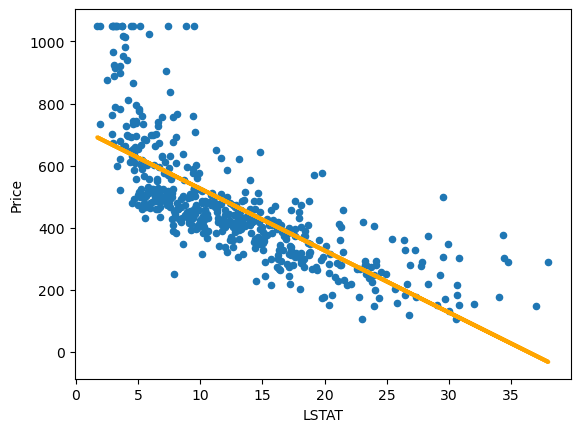

In [22]:
# Example higher order features
data.plot(x='LSTAT',y='Price',kind="scatter")

X=data.LSTAT.values.reshape(-1,1)
y=data.Price.values.reshape(-1,1)

lregmodel=linear_model.LinearRegression()
lregmodel.fit(X,y)
plt.plot(X,lregmodel.predict(X), color='orange',linewidth=3)

In [23]:
data.LSTAT.values.reshape(-1,1)

array([[ 4.98000002],
       [ 9.14000034],
       [ 4.03000021],
       [ 2.94000006],
       [ 5.32999992],
       [ 5.21000004],
       [12.43000031],
       [19.14999962],
       [29.93000031],
       [17.10000038],
       [20.45000076],
       [13.27000046],
       [15.71000004],
       [ 8.26000023],
       [10.26000023],
       [ 8.47000027],
       [ 6.57999992],
       [14.67000008],
       [11.68999958],
       [11.27999973],
       [21.02000046],
       [13.82999992],
       [18.71999931],
       [19.87999916],
       [16.29999924],
       [16.51000023],
       [14.81000042],
       [17.28000069],
       [12.80000019],
       [11.97999954],
       [22.60000038],
       [13.03999996],
       [27.70999908],
       [18.35000038],
       [20.34000015],
       [ 9.68000031],
       [11.40999985],
       [ 8.77000046],
       [10.13000011],
       [ 4.32000017],
       [ 1.98000002],
       [ 4.84000015],
       [ 5.80999994],
       [ 7.44000006],
       [ 9.55000019],
       [10

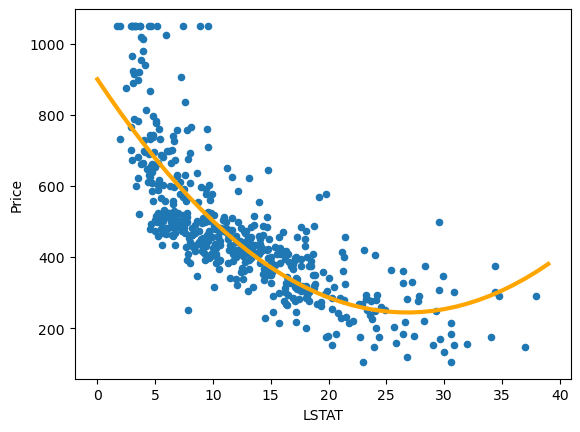

In [24]:
# Add a second order of LSTAT
data.plot(x='LSTAT',y='Price',kind="scatter")

data.insert(data.columns.size-1,'LSTAT^2',data.LSTAT**2)

X=data[["LSTAT","LSTAT^2"]].values
y=data.Price.values.reshape(-1,1)

lregmodel=linear_model.LinearRegression()
lregmodel.fit(X,y)

# Calculate a value from 0 to 40
newX= np.array([range(40),[x**2 for x in range(40)]])

plt.plot(newX[0],lregmodel.predict(newX.T), color='orange',linewidth=3)
#plt.scatter(newX[0],lregmodel.predict(newX.T),color="red")

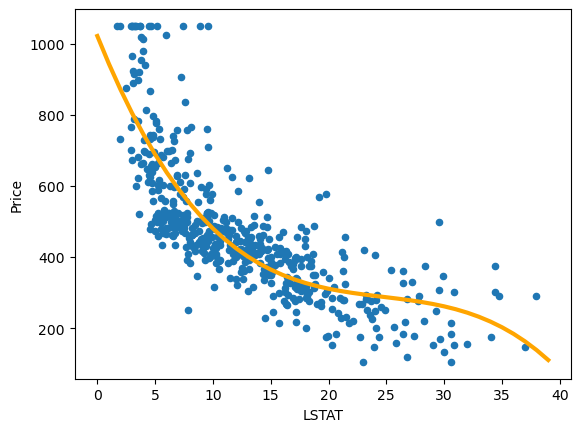

In [25]:
# Add a third order of LSTAT
data.plot(x='LSTAT',y='Price',kind="scatter")

data.insert(data.columns.size-1,'LSTAT^3',data.LSTAT**3)

X=data[["LSTAT","LSTAT^2","LSTAT^3"]].values
y=data.Price.values.reshape(-1,1)

lregmodel=linear_model.LinearRegression()
lregmodel.fit(X,y)

# Calculate a value from 0 to 40
newX= np.array([range(40),[x**2 for x in range(40)],[x**3 for x in range(40)]])

plt.plot(newX[0],lregmodel.predict(newX.T), color='orange',linewidth=3)

In [26]:
data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,LSTAT^2,LSTAT^3,Price
0,0.00632,18.0,2.31,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.800400,123.505993,504.000000
1,0.02731,0.0,7.07,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,83.539606,763.552030,453.600008
2,0.02729,0.0,7.07,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,16.240902,65.450837,728.700016
3,0.03237,0.0,2.18,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,8.643600,25.412185,701.400032
4,0.06905,0.0,2.18,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,28.408899,151.419431,760.200016


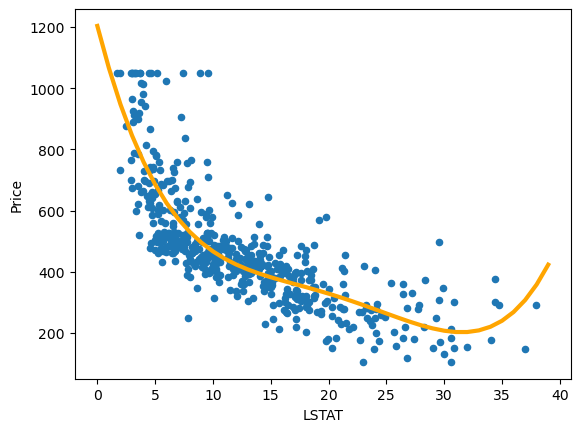

In [27]:
# Add a fourth order of LSTAT
data.plot(x='LSTAT',y='Price',kind="scatter")

data.insert(data.columns.size-1,'LSTAT^4',data.LSTAT**4)

X=data[["LSTAT","LSTAT^2","LSTAT^3","LSTAT^4"]].values
y=data.Price.values.reshape(-1,1)

lregmodel=linear_model.LinearRegression()
lregmodel.fit(X,y)

# Calculate a value from 0 to 40
newX= np.array([range(40),[x**2 for x in range(40)],[x**3 for x in range(40)],[x**4 for x in range(40)]])

plt.plot(newX[0],lregmodel.predict(newX.T), color='orange',linewidth=3)

In [28]:
# Let's overfit
# Add 12 orders of LSTAT based on the first 100 data points
# (Let's actually add up to 20, since then we can try this interactively and change the number of orders between 1 and 20)
data = pd.read_csv("../data/boston_housing.csv")
for i in range(2,21):
    data.insert(data.columns.size-1,f"LSTAT^{i}",data.LSTAT**i)

@interact(order=(1,20,1),data_points=(3,data.shape[0],1),)
def plotHigherorder(order=12,data_points=100):
    data.iloc[0:data_points,:].plot(x='LSTAT',y='Price',kind="scatter")

    X=data.iloc[0:data_points,12:12+order]
    minX=int(X.LSTAT.min())
    maxX=int(X.LSTAT.max())
    y=data.Price.values[0:data_points].reshape(-1,1)

    lregmodel=linear_model.LinearRegression()
    lregmodel.fit(X,y)

    # Calculate a value from the minimum value of the subset to the maximum value of the subset
    newX= np.array([[x**i for x in range(minX,maxX+1)]for i in range(1,order+1)])

    plt.plot(newX[0],lregmodel.predict(newX.T), color='orange',linewidth=3)

interactive(children=(IntSlider(value=12, description='order', max=20, min=1), IntSlider(value=100, descriptio…

### Regularization
A method to find a good balance between under- and overfitting.

This can be accomplished by adding an extra term to our loss function: $R(\theta)$ the regularization term 

$J(\theta) = \frac{1}{2m}\sum \limits _{i=1} ^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2} + R(\theta)$

$R(\theta)$ is an extra penalty that punishes the use of higher order features unless they decrease the entire cost of the loss function

$\theta$ is the used feature. (e.g. Price or LSTAT) ($\theta_0$ (= the intercept) is often not regularized)

There are two major forms of regularization:
* L1 (Lasso regression)
* L2 (Ridge regression)

#### L1 regression:
Uses the sum of the absolute values of $\theta$
* $J_{L1} = J + \lambda_1\sum\limits_{j=1}^m\lvert{\theta_j}\rvert$
* $J_{L1} = \sum \limits _{i=1} ^{n}(target^{(i)} - output^{(i)})^2 + \lambda_1\sum\limits_{j=1}^m\lvert{\theta_j}\rvert $

![L1-regression.png](../images/L1-regression.png)


#### L2 regression:
Uses the sum of the squared values of $\theta$
* $J_{L2} = J + \lambda_2\sum\limits_{j=1}^m\theta_j^2$
* $J_{L2} = \sum \limits _{i=1} ^{n}(target^{(i)} - output^{(i)})^2 + \lambda_2\sum\limits_{j=1}^m\theta_j^2 $

$\lambda$ is the tuning parameter (hyper parameter)
* $\lambda = 0 =>$ no regularization
* $\lambda = \infty => \theta = 0 $ (no orders are used ever)
* $0 < \lambda < \infty => $ possibility to tune the regularization 

![L2-regression.png](../images/L2-regression.png)

A smaller $\lambda$ results in a lower bias and higher variance = overfitting

A bigger $\lambda$ results in a higher bias and lower variance = underfitting

#### Implementation in sklearn
Instead of $\lambda$ we use the "alpha" parameter in sklearn

In [29]:
from sklearn.linear_model import Lasso,Ridge

higher_order_features=10
data_points=300

data = pd.read_csv("../data/boston_housing.csv")
for i in range(2,higher_order_features+1):
    data.insert(data.columns.size-1,f"LSTAT^{i}",data.LSTAT**i)

X=data.iloc[0:data_points,12:12+higher_order_features]
minX=int(X.LSTAT.min())
maxX=int(X.LSTAT.max())
y=data.Price.values[0:data_points].reshape(-1,1)

# Calculate a value from 3 to 30
newX= np.array([[x**i for x in range(minX,maxX+1)]for i in range(1,higher_order_features+1)])

# L1 linear regression = Lasso
print("L1 (Lasso)")
@interact(alpha=widgets.FloatText(value=0.1))
def Lasso_model(alpha=0.1):
    Lregmodel = Lasso(alpha=alpha, fit_intercept=True)
    Lregmodel.fit(X, y)
    score = Lregmodel.score(X,y)
    print(f"Score: {score}")
    #print(newX)
    data.iloc[0:data_points,:].plot(x='LSTAT',y='Price',kind="scatter")
    plt.plot(newX[0],Lregmodel.predict(newX.T), color='orange',linewidth=3)

# L2 linear regression = Ridge
print("L2 (Ridge)")
@interact(alpha=widgets.FloatText(value=0.1))
def Ridge_model(alpha=0.1):
    Rregmodel = Ridge(alpha=alpha, fit_intercept=True)
    Rregmodel.fit(X, y)
    score = Rregmodel.score(X,y)
    print(f"Score: {score}")
    data.iloc[0:data_points,:].plot(x='LSTAT',y='Price',kind="scatter")
    plt.plot(newX[0],Rregmodel.predict(newX.T), color='orange',linewidth=3)

L1 (Lasso)


interactive(children=(FloatText(value=0.1, description='alpha'), Output()), _dom_classes=('widget-interact',))

L2 (Ridge)


interactive(children=(FloatText(value=0.1, description='alpha'), Output()), _dom_classes=('widget-interact',))